In [43]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten,SimpleRNN
from tensorflow.keras.callbacks import TensorBoard


In [44]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join("../largedata")

# Actions that we try to detect  actions = np.array(['Familja', 'Missier', 'Bieb'])
actions = np.array(['Account','Flus', 'Missier', 'Passport','ThumbsUp','Pin','Dar'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

label_map = {label:num for num, label in enumerate(actions)}

label_map # When this is added accuracy skyrockets IMP

sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

np.array(sequences).shape
np.array(labels).shape
X = np.array(sequences)
X.shape
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_test.shape

log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [45]:
# Dataset loading and preprocessing code remains the same

# LSTM Model (as you've defined)
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=input_shape))
    model.add(LSTM(128, return_sequences=True, activation='relu'))
    model.add(LSTM(64, return_sequences=False, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# CNN Model for Sequence Data
def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# CNN Model for Sequence Data
def create_rnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(SimpleRNN(64, return_sequences=True, activation='relu', input_shape=input_shape))
    model.add(SimpleRNN(128, return_sequences=True, activation='relu'))
    model.add(SimpleRNN(64, return_sequences=False, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [46]:
# Adjust input_shape and num_classes based on your dataset
input_shape = (30, 1662)  # Example input shape
num_classes = len(actions)  # Based on your defined actions

# Initialize models
lstm_model = create_lstm_model(input_shape, num_classes)
cnn_model = create_cnn_model(input_shape, num_classes)
rnn_model = create_rnn_model(input_shape, num_classes)


In [47]:
lstm_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
cnn_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
rnn_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

Train The Models

In [48]:
history_lstm = lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
6/6 [==============================] - 4s 260ms/step - loss: 4.0948 - categorical_accuracy: 0.0833 - val_loss: 1.8818 - val_categorical_accuracy: 0.2143
Epoch 2/50
6/6 [==============================] - 1s 203ms/step - loss: 1.9530 - categorical_accuracy: 0.1548 - val_loss: 1.8737 - val_categorical_accuracy: 0.1905
Epoch 3/50
6/6 [==============================] - 1s 220ms/step - loss: 1.8834 - categorical_accuracy: 0.2440 - val_loss: 1.8559 - val_categorical_accuracy: 0.3095
Epoch 4/50
6/6 [==============================] - 1s 184ms/step - loss: 2.7140 - categorical_accuracy: 0.2262 - val_loss: 3.7829 - val_categorical_accuracy: 0.0952
Epoch 5/50
6/6 [==============================] - 1s 213ms/step - loss: 3.0049 - categorical_accuracy: 0.1786 - val_loss: 2.5724 - val_categorical_accuracy: 0.0952
Epoch 6/50
6/6 [==============================] - 1s 198ms/step - loss: 2.1121 - categorical_accuracy: 0.1607 - val_loss: 1.9342 - val_categorical_accuracy: 0.1429
Epoch 7/50
6/6 [

In [49]:
history_cnn = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
6/6 [==============================] - 1s 37ms/step - loss: 2.1067 - categorical_accuracy: 0.1369 - val_loss: 2.0407 - val_categorical_accuracy: 0.1667
Epoch 2/50
6/6 [==============================] - 0s 12ms/step - loss: 1.9817 - categorical_accuracy: 0.1667 - val_loss: 2.0037 - val_categorical_accuracy: 0.0952
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 1.8642 - categorical_accuracy: 0.2321 - val_loss: 1.6563 - val_categorical_accuracy: 0.5238
Epoch 4/50
6/6 [==============================] - 0s 14ms/step - loss: 1.6099 - categorical_accuracy: 0.4167 - val_loss: 1.6434 - val_categorical_accuracy: 0.3095
Epoch 5/50
6/6 [==============================] - 0s 12ms/step - loss: 1.5640 - categorical_accuracy: 0.3810 - val_loss: 1.5238 - val_categorical_accuracy: 0.4048
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 1.4614 - categorical_accuracy: 0.3988 - val_loss: 1.3032 - val_categorical_accuracy: 0.5952
Epoch 7/50
6/6 [======

In [50]:
history_rnn = rnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
6/6 [==============================] - 3s 159ms/step - loss: 1.9709 - categorical_accuracy: 0.1131 - val_loss: 1.9528 - val_categorical_accuracy: 0.1190
Epoch 2/50
6/6 [==============================] - 1s 92ms/step - loss: 1.8679 - categorical_accuracy: 0.1845 - val_loss: 1.8220 - val_categorical_accuracy: 0.2381
Epoch 3/50
6/6 [==============================] - 1s 88ms/step - loss: 1.7534 - categorical_accuracy: 0.2440 - val_loss: 1.9812 - val_categorical_accuracy: 0.2143
Epoch 4/50
6/6 [==============================] - 1s 89ms/step - loss: 1.6954 - categorical_accuracy: 0.2798 - val_loss: 1.9192 - val_categorical_accuracy: 0.2381
Epoch 5/50
6/6 [==============================] - 1s 90ms/step - loss: 1.6951 - categorical_accuracy: 0.2619 - val_loss: 1.5889 - val_categorical_accuracy: 0.3571
Epoch 6/50
6/6 [==============================] - 1s 86ms/step - loss: 1.4599 - categorical_accuracy: 0.4405 - val_loss: 1.4739 - val_categorical_accuracy: 0.5238
Epoch 7/50
6/6 [=====

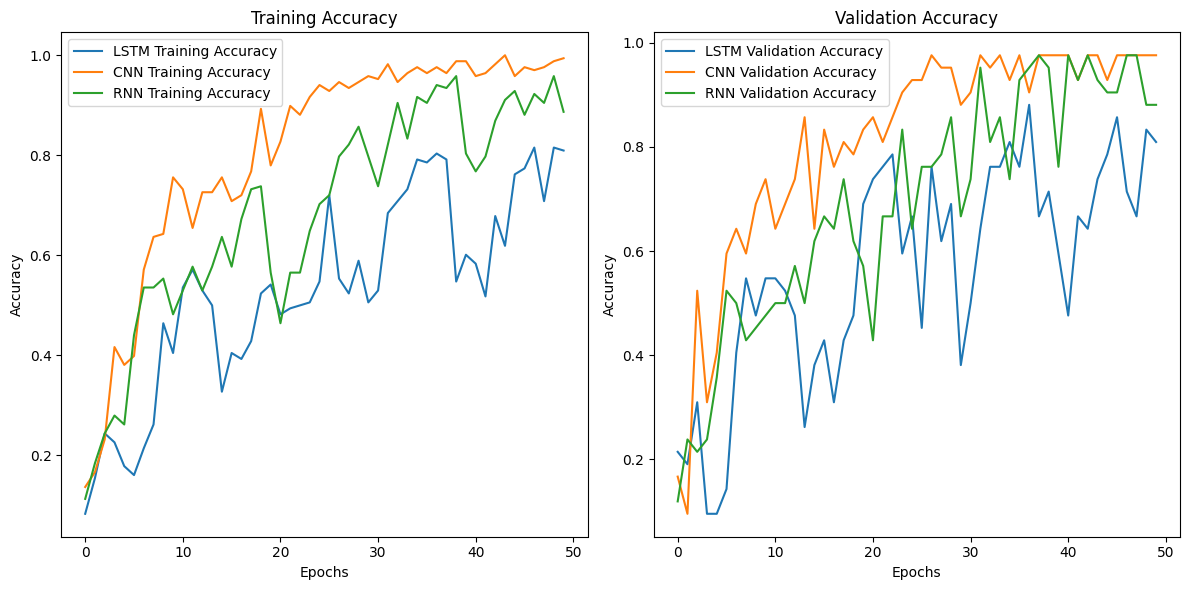

In [51]:
# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['categorical_accuracy'], label='LSTM Training Accuracy')
plt.plot(history_cnn.history['categorical_accuracy'], label='CNN Training Accuracy')
plt.plot(history_rnn.history['categorical_accuracy'], label='RNN Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['val_categorical_accuracy'], label='LSTM Validation Accuracy')
plt.plot(history_cnn.history['val_categorical_accuracy'], label='CNN Validation Accuracy')
plt.plot(history_rnn.history['val_categorical_accuracy'], label='RNN Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()